# CPU-only Feature

/tmp/ipykernel_906155/450371799.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, ['IPS', 'Memory Throughput']] = scaler.fit_transform(df[['IPS', 'Memory Throughput']])


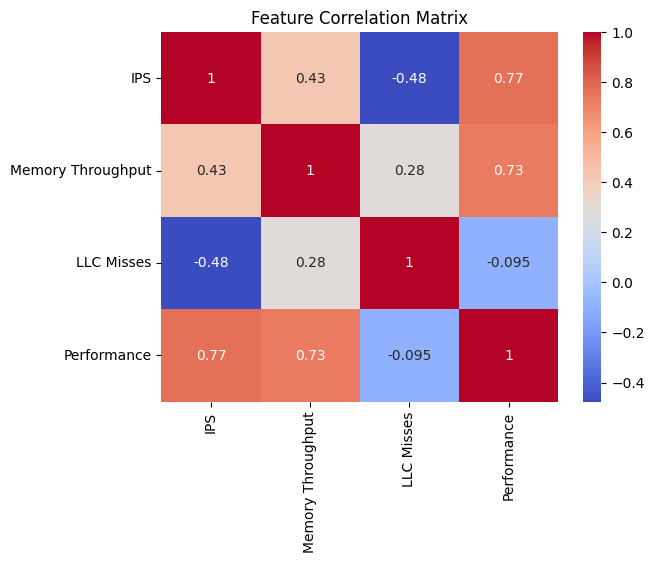

R² Score: 0.1552
Mean Absolute Error: 0.0278


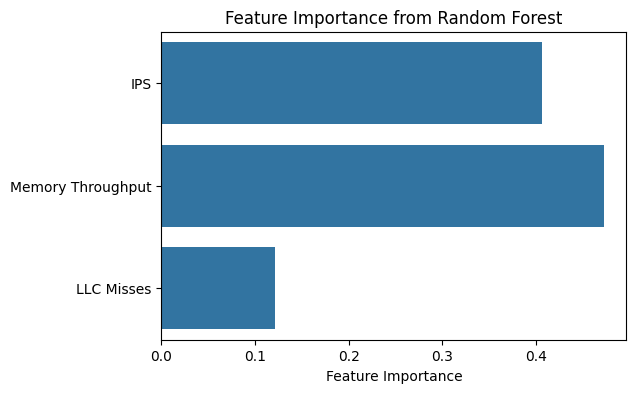

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

def load_csv_files(directory):
    """Load and merge all CSV files from the given directory."""
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = [pd.read_csv(f) for f in all_files]
    df = pd.concat(df_list, ignore_index=True)
    return df

def preprocess_data(df):
    """Clean and preprocess the dataset."""
    df.dropna(inplace=True)  # Remove missing values
    df = df[['IPS', 'Memory Throughput','LLC Misses','Performance']]  # Select relevant columns
    scaler = StandardScaler()
    df.loc[:, ['IPS', 'Memory Throughput']] = scaler.fit_transform(df[['IPS', 'Memory Throughput']])
    return df

def feature_analysis(df):
    """Perform correlation analysis and visualization."""
    # sns.pairplot(df)
    plt.show()
    
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Matrix")
    plt.show()

def train_model(df):
    """Train a Random Forest model to analyze feature importance."""
    X = df[['IPS', 'Memory Throughput','LLC Misses']]
    y = df['Performance']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    
    feature_importance = model.feature_importances_
    feature_names = ['IPS', 'Memory Throughput','LLC Misses']
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance from Random Forest")
    plt.show()

def main(directory):
    df = load_csv_files(directory)
    df = preprocess_data(df)
    feature_analysis(df)
    train_model(df)

if __name__ == "__main__":
    data_directory = "./ecp_power_cap_res/"  # Change this to your directory path
    main(data_directory)


# GPU Metrics Feature

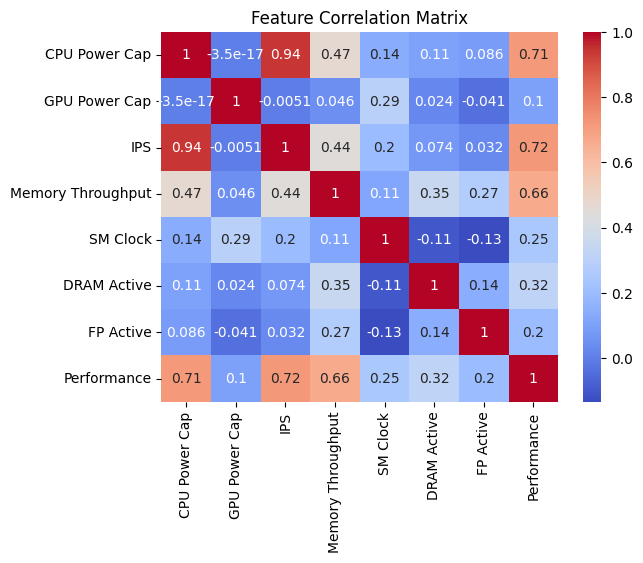

R² Score: 0.5723
Mean Absolute Error: 0.0487


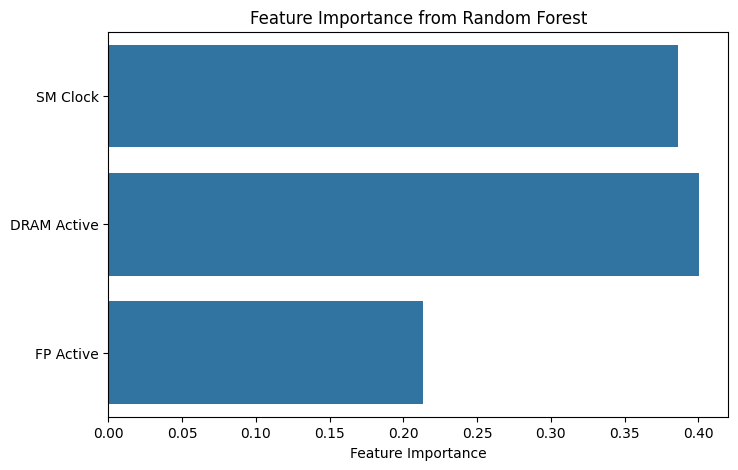

In [11]:
def load_csv_files(directory):
    """Load and merge all CSV files from the given directory."""
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = [pd.read_csv(f) for f in all_files]
    df = pd.concat(df_list, ignore_index=True)
    return df

def preprocess_data(df):
    """Clean and preprocess the dataset."""
    df.dropna(inplace=True)  # Remove missing values
    features = ['SM Clock', 'DRAM Active', 
                'FP Active']
    
    # Fill missing values with zero if any feature contains NaN values
    df[features] = df[features].fillna(0)

    # Standardize selected numerical features
    scaler = StandardScaler()
    df.loc[:, features] = scaler.fit_transform(df[features])

    return df

def feature_analysis(df):
    """Perform correlation analysis and visualization."""
    # sns.pairplot(df)
    plt.show()
    
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Matrix")
    plt.show()

def train_model(df):
    """Train a Random Forest model to analyze feature importance."""
    features = ['SM Clock', 'DRAM Active', 
                'FP Active']
    
    X = df[features]
    y = df['Performance']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature_importance, y=features)
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance from Random Forest")
    plt.show()

def main(directory):
    df = load_csv_files(directory)
    df = preprocess_data(df)
    feature_analysis(df)
    train_model(df)

if __name__ == "__main__":
    data_directory = "./altis_power_cap_res/2_dual_cap/"  # Change this to your directory path
    main(data_directory)

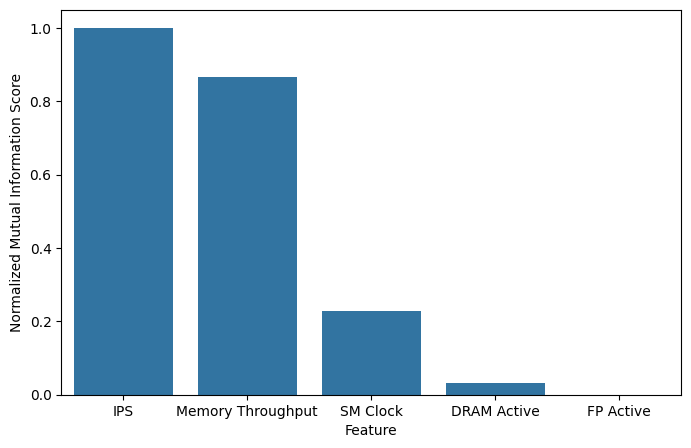


Mutual Information Scores for Predicting Performance:
             Feature      MI Score  Normalized MI Score
0                IPS  2.057544e+00         1.000000e+00
1  Memory Throughput  1.784428e+00         8.672611e-01
2           SM Clock  4.674892e-01         2.272074e-01
3        DRAM Active  6.404691e-02         3.112785e-02
4          FP Active  2.220446e-16         1.079173e-16


In [10]:
from sklearn.feature_selection import mutual_info_regression

def load_csv_files(directory):
    """Load and merge all CSV files from the given directory."""
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = [pd.read_csv(f) for f in all_files]
    df = pd.concat(df_list, ignore_index=True)
    return df

def preprocess_data(df):
    """Clean and preprocess the dataset."""
    df.dropna(inplace=True)  # Remove missing values
    features = ['IPS','Memory Throughput','SM Clock', 'DRAM Active', 'FP Active']

    # Fill missing values with zero if any feature contains NaN values
    df[features] = df[features].fillna(0)

    # Standardize selected numerical features
    scaler = StandardScaler()
    df.loc[:, features] = scaler.fit_transform(df[features])

    return df

def compute_mutual_information(df):
    """Compute Mutual Information (MI) between features and Performance."""
    features = ['IPS','Memory Throughput','SM Clock', 'DRAM Active', 'FP Active']
    
    X = df[features]
    y = df['Performance']  # Predictand (target variable)

    # Compute MI scores
    mi_scores = mutual_info_regression(X, y, random_state=42)

    # Convert to DataFrame for visualization
    mi_df = pd.DataFrame({'Feature': features, 'MI Score': mi_scores})

    # Plot MI scores
    plot_mutual_information(mi_df)

    return mi_df

# def plot_mutual_information(mi_df):
#     """Plot Mutual Information scores for predicting Performance."""
#     plt.figure(figsize=(8, 5))
    
#     # Plot MI scores
#     sns.barplot(x=mi_df['Feature'], y=mi_df['MI Score'])

#     plt.xlabel("Features")
#     plt.ylabel("Mutual Information Score")
#     plt.title("Mutual Information Scores for Predicting Performance")
#     plt.xticks()
#     plt.show()

def plot_mutual_information(mi_df):
    """Plot Mutual Information scores for predicting Performance with normalization."""
    mi_df["Normalized MI Score"] = mi_df["MI Score"] / mi_df["MI Score"].max()  # Normalize to [0,1]

    plt.figure(figsize=(8, 5))
    sns.barplot(x=mi_df['Feature'], y=mi_df['Normalized MI Score'])

    # plt.xlabel("Features")
    plt.ylabel("Normalized Mutual Information Score")
    # plt.title("Normalized Mutual Information Scores for Predicting Performance")
    plt.xticks()
    plt.show()

def main(directory):
    df = load_csv_files(directory)
    df = preprocess_data(df)
    mi_results = compute_mutual_information(df)

    print("\nMutual Information Scores for Predicting Performance:")
    print(mi_results)

if __name__ == "__main__":
    data_directory = "./altis_power_cap_res/2_dual_cap/"  # Change this to your directory path
    main(data_directory)
